In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from datetime import datetime
from dateutil.parser import parser
import baostock as bs
import matplotlib.pyplot as plt

In [2]:
#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.600592",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2018-01-01', end_date='2021-11-16',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 登出系统 ####
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
logout success!


In [3]:
result

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
0,2018-01-02,sh.600896,7.0400,7.1800,7.0000,7.0900,7.1500,1953070,13773154.0000,3,0.338412,1,-0.839160,0
1,2018-01-03,sh.600896,7.0500,7.1600,7.0500,7.1300,7.0900,1674327,11921740.0000,3,0.290113,1,0.564174,0
2,2018-01-04,sh.600896,7.1300,7.2300,7.1200,7.1400,7.1300,1581002,11327903.0000,3,0.273943,1,0.140249,0
3,2018-01-05,sh.600896,7.1400,7.1800,7.0800,7.1700,7.1400,1830420,13046910.0000,3,0.317160,1,0.420171,0
4,2018-01-08,sh.600896,7.1800,7.2000,7.1300,7.1700,7.1700,1378200,9863562.0000,3,0.238803,1,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2021-11-10,sh.600896,4.1900,4.2000,4.1400,4.1800,4.1800,3016902,12575673.3300,3,0.319100,1,0.000000,1
936,2021-11-11,sh.600896,4.1700,4.2600,4.1600,4.2500,4.1800,3270858,13819097.4800,3,0.346000,1,1.674600,1
937,2021-11-12,sh.600896,4.2600,4.3700,4.2600,4.3400,4.2500,4517903,19584550.7600,3,0.477900,1,2.117600,1
938,2021-11-15,sh.600896,4.3900,4.5400,4.3400,4.4000,4.3400,8728310,38597606.2500,3,0.923200,1,1.382500,1


In [4]:
result.sort_values(by='date',ascending=False)

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
939,2021-11-16,sh.600896,4.3900,4.6200,4.3800,4.6200,4.4000,13943751,63191894.3300,3,1.474800,1,5.000000,1
938,2021-11-15,sh.600896,4.3900,4.5400,4.3400,4.4000,4.3400,8728310,38597606.2500,3,0.923200,1,1.382500,1
937,2021-11-12,sh.600896,4.2600,4.3700,4.2600,4.3400,4.2500,4517903,19584550.7600,3,0.477900,1,2.117600,1
936,2021-11-11,sh.600896,4.1700,4.2600,4.1600,4.2500,4.1800,3270858,13819097.4800,3,0.346000,1,1.674600,1
935,2021-11-10,sh.600896,4.1900,4.2000,4.1400,4.1800,4.1800,3016902,12575673.3300,3,0.319100,1,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2018-01-08,sh.600896,7.1800,7.2000,7.1300,7.1700,7.1700,1378200,9863562.0000,3,0.238803,1,0.000000,0
3,2018-01-05,sh.600896,7.1400,7.1800,7.0800,7.1700,7.1400,1830420,13046910.0000,3,0.317160,1,0.420171,0
2,2018-01-04,sh.600896,7.1300,7.2300,7.1200,7.1400,7.1300,1581002,11327903.0000,3,0.273943,1,0.140249,0
1,2018-01-03,sh.600896,7.0500,7.1600,7.0500,7.1300,7.0900,1674327,11921740.0000,3,0.290113,1,0.564174,0


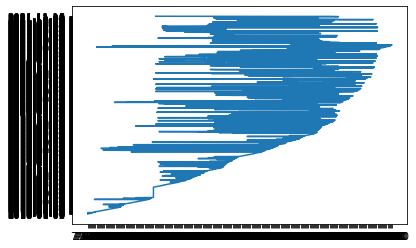

In [12]:
plt.plot(result['close'],result['date'])
plt.show()